# Modification of Dataset according to need

In [2]:
%pip install pandas numpy

import pandas as pd
import numpy as np

# Load your dataset
file_path = 'Debernardi et al 2020 data.csv'
data = pd.read_csv(file_path)

data['BMI'] = np.random.uniform(18.5, 35.0, size=len(data)).round(1)

data['Diabetes Status'] = np.random.choice(['Yes', 'No'], size=len(data), p=[0.15, 0.85])

data['Smoking History'] = np.random.choice(['Never', 'Former', 'Current'], size=len(data), p=[0.5, 0.3, 0.2])

data['Alcohol Consumption'] = np.random.choice(['Never', 'Moderate', 'Heavy'], size=len(data), p=[0.4, 0.4, 0.2])

data.to_csv('Debernardi_modified_data.csv', index=False)
print("Columns added and dataset saved as 'Debernardi_modified_data.csv'")

Defaulting to user installation because normal site-packages is not writeable
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 3.0 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.
Columns added and dataset saved as 'Debernardi_modified_data.csv'


# Main Code and Prediction

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 3.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.71      0.68      0.69        37
           2       0.72      0.76      0.74        41
           3       1.00      1.00      1.00        40

    accuracy                           0.81       118
   macro avg       0.81      0.81      0.81       118
weighted avg       0.81      0.81      0.81       118



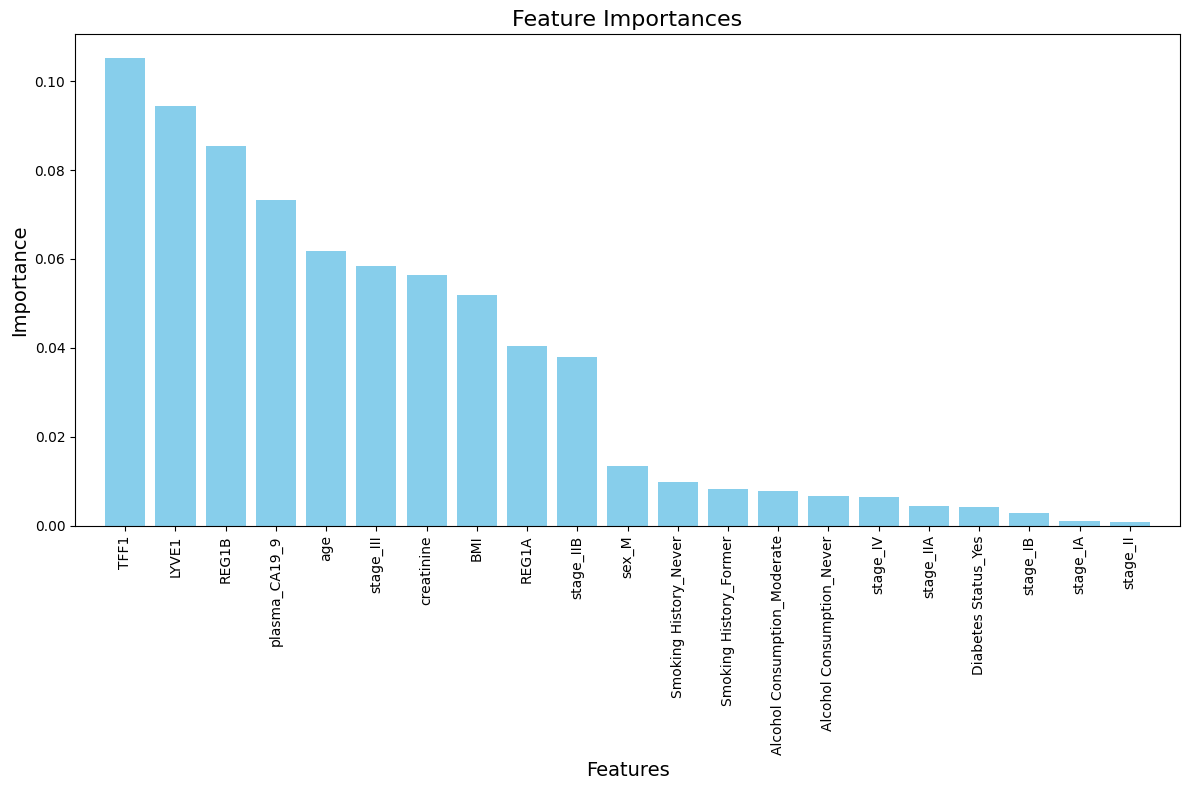

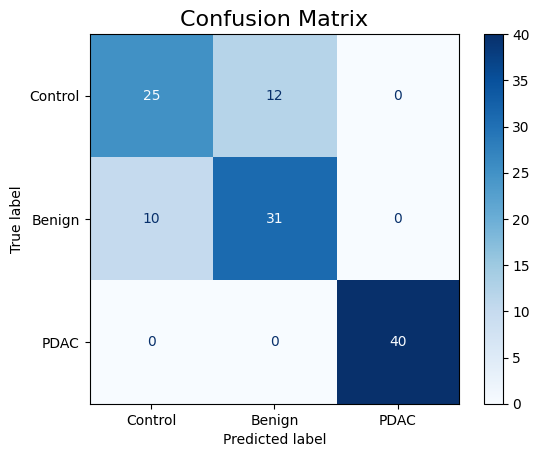

In [1]:
%pip install scikit-learn matplotlib pandas numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the modified dataset
file_path = 'Debernardi_modified_data.csv'
data = pd.read_csv(file_path)

data['diagnosis'] = data['diagnosis'].fillna(1).astype(int)  # Assume patient is healthy

data['stage'] = data['stage'].fillna('Unknown')  # Fill NaNs with a placeholder or consider dropping

numeric_cols = data.select_dtypes(include='number').columns # picking the numeric data colums
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())  # Fill NaNs with mean

# Convert categorical features to numerical using one-hot encoding
categorical_columns = ['Diabetes Status', 'Smoking History', 'Alcohol Consumption', 'sex', 'stage']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

data.to_csv('test.csv', index=False) # remove later

# Define features and target variable
X = data.drop(columns=['sample_id', 'patient_cohort', 'sample_origin', 'diagnosis', 'benign_sample_diagnosis'])
y = data['diagnosis']

# Convert boolean columns to int (True -> 1, False -> 0)
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for more detailed metrics
print(classification_report(y_test, y_pred))

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Filter out 'stage_Unknown' from feature importances
feature_names = X.columns
filtered_indices = [i for i in indices if feature_names[i] != 'stage_Unknown']

# Plot the filtered feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances', fontsize=16)
plt.bar(range(len(filtered_indices)), importances[filtered_indices], align='center', color='skyblue')
plt.xticks(range(len(filtered_indices)), feature_names[filtered_indices], rotation=90, fontsize=10)
plt.xlim([-1, len(filtered_indices)])
plt.ylabel('Importance', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.tight_layout()
plt.show()


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Control', 'Benign', 'PDAC'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=16)
plt.show()
# Testing with just one row:

In [3]:
import pandas as pd

# Example: Row S1 from your dataset
raw_row = {
    'age': 33,
    'sex': 'F',
    'plasma_CA19_9': 11.7,
    'creatinine': 1.83222,
    'LYVE1': 0.8932192,
    'REG1B': 52.94884,
    'TFF1': 654.282174,
    'REG1A': 1262,
    'BMI': 33.8,
    'Diabetes Status': 'No',
    'Smoking History': 'Never',
    'Alcohol Consumption': 'Moderate',
    'stage': 'Unknown'
}

# Convert raw data to a DataFrame
single_test_data = pd.DataFrame([raw_row])

# Handle missing values and preprocessing (same steps as training)
single_test_data['diagnosis'] = 1  # Add target column temporarily for preprocessing
numeric_cols = single_test_data.select_dtypes(include='number').columns
single_test_data[numeric_cols] = single_test_data[numeric_cols].fillna(single_test_data[numeric_cols].mean())

# One-hot encode categorical variables
categorical_columns = ['Diabetes Status', 'Smoking History', 'Alcohol Consumption', 'sex', 'stage']
single_test_data = pd.get_dummies(single_test_data, columns=categorical_columns, drop_first=True)

# Drop irrelevant columns used in preprocessing
single_test_data = single_test_data.drop(columns=['diagnosis'], errors='ignore')

# Match feature order with training set
single_test_data = single_test_data.reindex(columns=X.columns, fill_value=0)

# Predict using the trained Random Forest model
single_prediction = rf_model.predict(single_test_data)
single_prediction_proba = rf_model.predict_proba(single_test_data)

# Output the results
print(f"Predicted Class: {single_prediction[0]}")
print(f"Prediction Probabilities: {single_prediction_proba}")


Predicted Class: 3
Prediction Probabilities: [[0.11 0.08 0.81]]
